# Demo notebook for sign-language image classification

# Helga Shiryaeva

# 10.09.2018

## Implementation of binary classification with 99.6% accuracy on test set
## Claasifying letter 'A' and symbol 'Delete'

# Import dependencies

In [55]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from random import shuffle
from keras.models import model_from_json
import numpy as np
from tqdm import tqdm
import os
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

# Necessary parameters and paths

In [56]:
IMG_SIZE = 64
VALIDATION_TEST_SIZE = 400
TEST_SIZE = 100

DIRS = [
    r"C:\Users\helga_sh\PycharmProjects\asl-alphabet\asl-alphabet\asl_alphabet_train\asl_alphabet_train\A",
    r"C:\Users\helga_sh\PycharmProjects\asl-alphabet\asl-alphabet\asl_alphabet_train\asl_alphabet_train\del"
]
SAVED_DATA_NAME = 'train-test-A-del.npy'
load_model = True

# Decerealization of image data

In [57]:
data = np.load('train-test-A-del.npy')

In [58]:
def split_data(data):
    return np.array(data[:len(data) - TEST_SIZE]), np.array(data[-VALIDATION_TEST_SIZE:-TEST_SIZE])

# Preparing train and test set

In [59]:
train, test = split_data(data)

In [60]:
def split_labels(labeled_images):
    return np.array([i[0] for i in labeled_images]), np.array([i[1] for i in labeled_images])

In [61]:
X, Y = split_labels(train)
x_test, y_test = split_labels(test)
X = X.reshape([-1, IMG_SIZE, IMG_SIZE, 1])
x_test = x_test.reshape([-1, IMG_SIZE, IMG_SIZE, 1])

# Convolutional neural network model

# Loss function in this case is binary crossentropy
# in case there are 2 classes of images for now.

In [62]:
def built_cnn():
    model = Sequential()
    model.add(Conv2D(16, (2, 2), input_shape=(64, 64, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()
    return model 

# Load already trained model

## Last training results :
###  Epoch 30/30
### - 10s - loss: 1.5387e-06 - acc: 1.0000 - val_loss: 4.4554e-07 - val_acc: 1.0000

In [63]:
def load_model_from_json():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights("model.h5")
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()
    print("Loaded model from disk")

    return model

In [64]:
model = None
if load_model:
    model = load_model_from_json()
else:
    model = built_cnn()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 63, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          51264     
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
__________

# Network train if needed

In [65]:
def train_network(model, X, Y, x_test, y_test):
    history = model.fit(X, Y,
                        batch_size=32,
                        epochs=30,
                        verbose=2,
                        validation_data=(x_test, y_test))
    save_model(model)
    return history

In [66]:
def plot_images(labeled_images, row, col):
    fig = plt.figure()
    for num, data in enumerate(labeled_images):
        img_data = data[0]
        label = data[1]
        if label[0] == 1:
            label = 'A'
        else:
            label = 'Delete'
        y = fig.add_subplot(row, col, num + 1)
        y.imshow(np.reshape(img_data, (IMG_SIZE, IMG_SIZE)), cmap='gray')
        plt.title(label)
        y.get_xaxis().set_visible(False)
        y.get_yaxis().set_visible(False)
    plt.show()

# Images from the train set

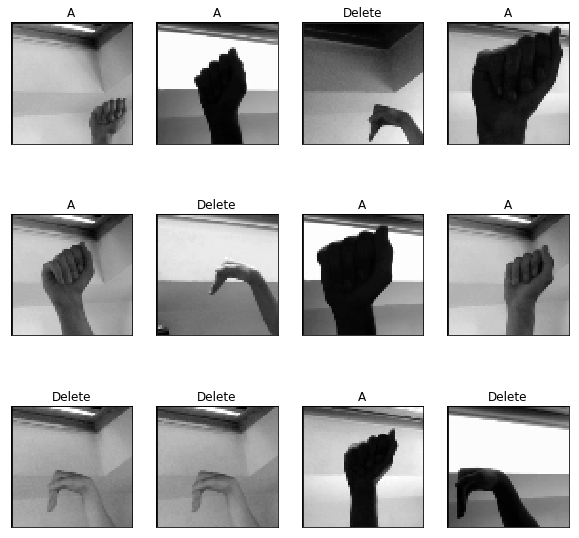

In [67]:
plot_images(train[:12], 3, 4)

# Testing on untrained images

In [68]:
def evaluate_model(model, images):
    answers = []
    for image in images:
        answer = model.predict(np.reshape(image, (1, IMG_SIZE, IMG_SIZE, 1)))
        answer0 = answer.argmax()
        answers.append((image, answer0))

    fig = plt.figure()
    row = 5
    col = 5
    answers = answers[:row * col]
    
    for num, (image, label) in enumerate(answers):
        y = fig.add_subplot(row, col, num + 1)
        y.imshow(np.reshape(image, (IMG_SIZE, IMG_SIZE)), cmap='gray')
        if label == 0:
            label = 'A'
        elif label == 1:
            label = 'Delete'
        plt.title('Model : {} '.format(label))
        y.get_xaxis().set_visible(False)
        y.get_yaxis().set_visible(False)
    plt.show()

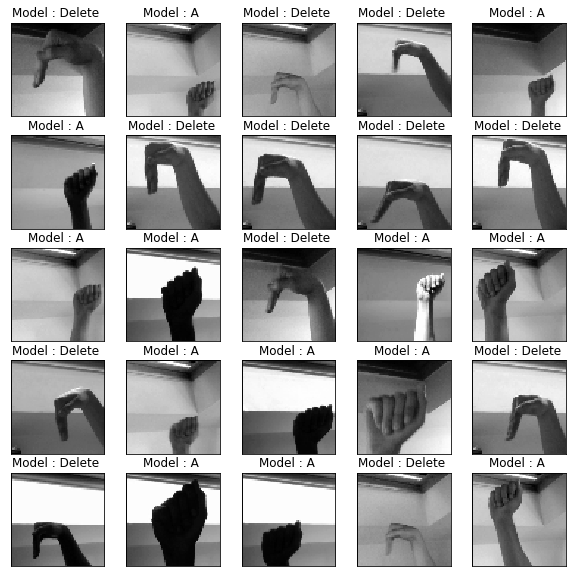

In [69]:
evaluate_model(model, x_test[-TEST_SIZE:])

## Accuracy - 100%

# Thank you.